# Figure 3
data is stored in ../../data

# setup and load data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dms_3d_features.plotting import (
    plot_pop_avg_from_row,
    publication_style_ax,
    plot_violins_w_percent,
    plot_motif_boxplot_stripplot,
    format_small_plot,
)

## extra functions

In [28]:
def plot_violinplot_with_percentages(df, y_column, color="tab:red", ax=None):
    # Calculate percentages
    percentages = (
        df.groupby(y_column)
        .apply(lambda x: (x["ln_r_data"] > -5.45).mean() * 100)
        .round(2)
    )

    # Sort y_column values by percentage
    sorted_y_values = percentages.sort_values(ascending=False).index

    if ax is None:
        fig, ax = plt.subplots(figsize=(2.0, 1.5), dpi=200)
    else:
        fig = ax.figure

    sns.violinplot(
        data=df,
        x="ln_r_data",
        y=y_column,
        density_norm="width",
        color=color,
        linewidth=0.5,
        order=sorted_y_values,
        ax=ax,
    )
    ax.axvline(-5.45, color="black", linestyle="--", lw=0.5)

    # Add percentage labels
    for i, y_value in enumerate(sorted_y_values):
        ax.text(-9.7, i, f"{percentages[y_value]:.2f}%", va="center", ha="right")

    ax.set_xlim(-12.5, -3)
    ax.set_xticks([-10, -8, -6, -4, -2])
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    y_label = ""
    if y_column == "p3_res":
        y_label = "3' Nucleotide"
    elif y_column == "p5_res":
        y_label = "5' Nucleotide"
    elif y_column == "r_stack":
        y_label = "Nucleotide Stack"
    ax.set_ylabel(y_label, labelpad=2)
    format_small_plot(ax)

    return fig, ax

### load data

In [2]:
DATA_PATH = "../../data/"

In [6]:
df_constructs = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1.json")
df_constructs_nomod = pd.read_json(
    f"{DATA_PATH}/raw-jsons/constructs/pdb_library_nomod.json"
)
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"])
df["ln_r_data"].replace(-np.inf, -9.8, inplace=True)

df = df.query("r_data_outlier == False").copy()
df_wc = df.query("r_type == 'Flank-WC'").copy()

df_wc.sort_values("ln_r_data", inplace=True, ascending=False)

df_wc_high = df_wc.query("ln_r_data > -5.45").copy()
df_wc_high.sort_values("ln_r_data", inplace=True, ascending=False)

df_bp_details = pd.read_csv(f"../../dms_3d_features/resources/csvs/wc_details.csv")
df_bp_details = df_bp_details.query("flanking_pairs == 'YES'")
df_bp_details["ln_r_data"] = np.log(df_bp_details["r_data"])

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Plotting 

## Figure 3a: As are more reactive in flanking pairs

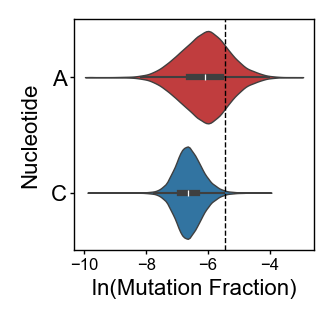

In [7]:
def figure_3a(df_wc, ax):
    """Create violin plot comparing A and C nucleotide mutation rates."""
    ax = sns.violinplot(
        data=df_wc,
        x="ln_r_data",
        y="r_nuc",
        hue="r_nuc",
        density_norm="width",
        palette=["tab:red", "tab:blue"],
        legend=False,
        linewidth=0.5,
        ax=ax,
    )
    ax.axvline(-5.45, color="black", linestyle="--", lw=0.5)
    ax.set_ylabel("Nucleotide")
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_xticks([-10, -8, -6, -4])
    format_small_plot(ax)
    for label in ax.get_yticklabels():
        label.set_fontsize(8)
    return ax


fig, ax = plt.subplots(figsize=(2.0, 1.5), dpi=200)
figure_3a(df_wc, ax)
plt.savefig("pngs/figure_3a.png", dpi=600)

<Axes: xlabel='Nucleotide', ylabel='Mutation Fraction'>

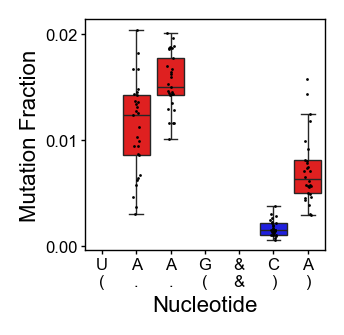

In [8]:
def figure_3b(df, ax):
    """Create boxplot with strip plot for UAAG&CA motif."""
    plot_motif_boxplot_stripplot(
        df.query("m_sequence == 'UAAG&CA'"), ax=ax, show_structure=True
    )
    format_small_plot(ax)
    return ax


fig, ax = plt.subplots(figsize=(2.0, 1.5), dpi=200)
figure_3b(df, ax)
plt.savefig("pngs/figure_3b.png", dpi=600)

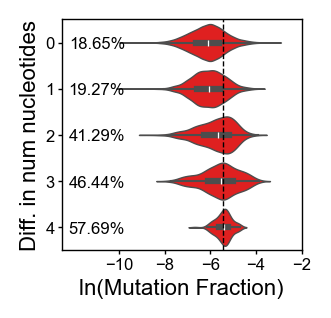

In [22]:
df_pos = df_wc.query("r_nuc == 'A'").copy()
df_pos["side_diff"] = [
    abs(int(x.split("x")[0]) - int(x.split("x")[1])) for x in df_pos["m_token"]
]
df_pos["side_diff"] = df_pos["side_diff"].astype(str)
df_pos.sort_values("side_diff", inplace=True, ascending=True)
fig, ax = plt.subplots(figsize=(2.0, 1.5), dpi=200)
plot_violins_w_percent(
    df_pos, "ln_r_data", "side_diff", text_offset=0.75, color="red", ax=ax
)
ax.set_xlim(-12.5, -3)
ax.set_xticks([-10, -8, -6, -4, -2])
ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
ax.set_ylabel("Diff. in num nucleotides", labelpad=2)
format_small_plot(ax)
plt.savefig("pngs/figure_3d.png", dpi=600)

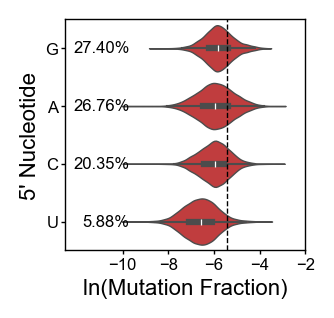

In [30]:
df_pos = df_wc.query("r_nuc == 'A'").copy()
fig, ax = plt.subplots(figsize=(2.0, 1.5), dpi=200)
plot_violinplot_with_percentages(df_pos, y_column="p5_res", color="tab:red", ax=ax)
plt.savefig("pngs/figure_3e.png", dpi=600)

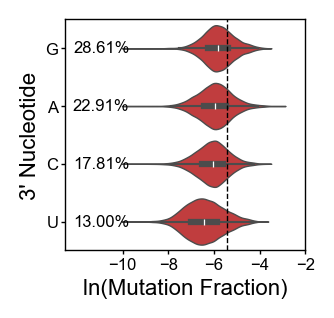

In [31]:
df_pos = df_wc.query("r_nuc == 'A'").copy()
fig, ax = plt.subplots(figsize=(2.0, 1.5), dpi=200)
plot_violinplot_with_percentages(df_pos, y_column="p3_res", color="tab:red", ax=ax)
plt.savefig("pngs/figure_3f.png", dpi=600)

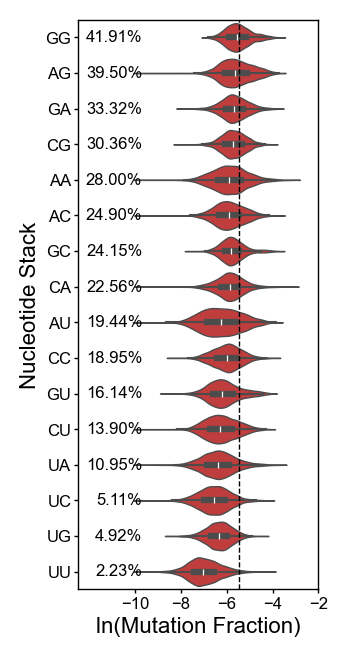

In [35]:
df_pos = df_wc.query("r_nuc == 'A'").copy()
fig, ax = plt.subplots(figsize=(2.0, 3.7), dpi=200)
plot_violinplot_with_percentages(df_pos, y_column="r_stack", color="tab:red", ax=ax)
plt.savefig("pngs/figure_3g.png", dpi=600)